In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from scipy import io

import requests
import json 


In [ ]:
#original file is over 10,000 snps, 
#need to add 'chr' and '_b38' to variant_id

#can only pass 999 variant IDs through API at once, and then need to collect each page to collate as one dataframe 
#split variant IDs into separate lists of 1000, then loop to run the API for each list(0-9)

#convert all the dictionaries to df
#then collate all of the df


In [2]:
gwasv2 = pd.read_csv('/home/j87832lw/mounting/oviduct/data/v2_GCST90272883.h.top10000.txt', sep='\t', header=0)
gwasv2_100=gwasv2.head(100)
gwasv2_999=gwasv2.head(999)

In [3]:
variant_ids = gwasv2['chrvariant_id_b38'].tolist()

In [4]:
gwasv2 

,chromosome,base_pair_location,effect_allele,other_allele,beta,standard_error,effect_allele_frequency,p_value,rsid,rs_id,hm_coordinate_conversion,hm_code,variant_id,chrvariant_id_b38
0,13,82585994,A,G,50.773600,5.327933,0.000032,1.680000e-21,rs550367104,rs550367104,lo,11,13_82585994_G_A,chr13_82585994_G_A_b38
1,5,120593698,C,G,54.392800,6.105988,0.000020,5.500000e-19,rs6863583,rs6863583,lo,6,5_120593698_G_C,chr5_120593698_G_C_b38
2,5,120738781,C,T,53.842200,6.059460,0.000021,6.730000e-19,rs529687696,rs529687696,lo,11,5_120738781_T_C,chr5_120738781_T_C_b38
3,12,44236980,C,T,38.940100,4.429122,0.000032,1.560000e-18,rs567339140,rs567339140,lo,11,12_44236980_T_C,chr12_44236980_T_C_b38
4,12,44252248,A,G,38.940100,4.429122,0.000032,1.560000e-18,rs544646836,rs544646836,lo,11,12_44252248_G_A,chr12_44252248_G_A_b38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,86623232,A,G,0.128637,0.036984,0.056878,5.080000e-04,rs73485644,rs73485644,lo,11,6_86623232_G_A,chr6_86623232_G_A_b38
9996,6,86623756,C,T,-0.128593,0.036969,0.943120,5.080000e-04,rs1338710,rs1338710,lo,11,6_86623756_T_C,chr6_86623756_T_C_b38
9997,6,132032510,A,G,1.229255,0.353393,0.000467,5.080000e-04,rs566992537,rs566992537,lo,11,6_132032510_G_A,chr6_132032510_G_A_b38
9998,7,36689739,A,G,-0.063286,0.018196,0.622760,5.080000e-04,rs4077339,rs4077339,lo,11,7_36689739_G_A,chr7_36689739_G_A_b38


In [6]:
n=10
sublists = np.array_split(variant_ids, n)
sublists = [list(arr) for arr in sublists]  # convert numpy arrays to lists 

#sublists from 0 - 9 values

In [7]:
sublists[0]= gwasv2_999['chrvariant_id_b38'].tolist()

# calling API for each tissue

rewrite this as a function, call each tissue and add to 'masterlist of all tissues, then wont need to combine all dfs at the end 

## whole blood eqtls 

In [8]:

#list to add data to 
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Whole_Blood',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            #check number of pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

wholeblooddf = pd.DataFrame(all_data)

print(wholeblooddf)
wholeblooddf.to_csv("10000variantids_wholeblood.csv")

            snpId        pos   snpIdUpper               variantId geneSymbol  \
0       rs4971066  155133406    RS4971066  chr1_155133406_T_G_b38  DCST1-AS1   
1       rs4440846  155158322    RS4440846  chr1_155158322_C_T_b38  DCST1-AS1   
2       rs9330264  155123274    RS9330264  chr1_155123274_T_C_b38     ADAM15   
3       rs6676150  155151361    RS6676150  chr1_155151361_G_C_b38     ADAM15   
4       rs7535292  155155273    RS7535292  chr1_155155273_T_C_b38     ADAM15   
...           ...        ...          ...                     ...        ...   
3138    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38     ZNF559   
3139    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38     ZNF266   
3140    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38     ZNF561   
3141  rs146728316   47595301  RS146728316  chr19_47595301_C_T_b38       SAE1   
3142    rs6032678   46148656    RS6032678  chr20_46148656_C_T_b38       CD40   

             pValue geneSymbolUpper dat

In [9]:
wholeblood_genenames = wholeblooddf.drop_duplicates(subset=['geneSymbol'])
wholeblood_genenames = wholeblood_genenames['geneSymbol'].tolist()

In [10]:
len(wholeblood_genenames)

187

## vagina eqtls 

In [11]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Vagina',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

vaginadf = pd.DataFrame(all_data)

print(vaginadf)
vaginadf.to_csv("10000variantids_vagina.csv")

           snpId        pos   snpIdUpper               variantId geneSymbol  \
0      rs9330264  155123274    RS9330264  chr1_155123274_T_C_b38      GBAP1   
1      rs6676150  155151361    RS6676150  chr1_155151361_G_C_b38      GBAP1   
2      rs4460629  155162859    RS4460629  chr1_155162859_T_C_b38      GBAP1   
3     rs12752585  155162930   RS12752585  chr1_155162930_G_A_b38      GBAP1   
4      rs4971085  155165746    RS4971085  chr1_155165746_T_C_b38      GBAP1   
..           ...        ...          ...                     ...        ...   
252  rs113338212   94866346  RS113338212   chr8_94866346_G_A_b38      INTS8   
253   rs71522411  145021863   RS71522411  chr8_145021863_T_C_b38    C8orf33   
254    rs7014728  145056420    RS7014728  chr8_145056420_G_T_b38    C8orf33   
255   rs28424072   55781463   RS28424072  chr16_55781463_G_A_b38     CES1P1   
256    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38     ZNF266   

           pValue geneSymbolUpper datasetId tissueS

In [12]:
vagina_genenames = vaginadf.drop_duplicates(subset=['geneSymbol'])
vagina_genenames = vagina_genenames['geneSymbol'].tolist()

In [13]:
len(vagina_genenames)

18

## uterus eqtls

In [14]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Uterus',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

uterusdf = pd.DataFrame(all_data)

print(uterusdf)
uterusdf.to_csv("10000variantids_uterus.csv")

         snpId        pos snpIdUpper               variantId  geneSymbol  \
0    rs2857211   32772665  RS2857211   chr6_32772665_A_G_b38     HLA-DOB   
1    rs2621419   32773229  RS2621419   chr6_32773229_T_C_b38     HLA-DOB   
2    rs2857210   32773965  RS2857210   chr6_32773965_A_G_b38     HLA-DOB   
3    rs2621415   32774117  RS2621415   chr6_32774117_T_C_b38     HLA-DOB   
4    rs2621414   32774282  RS2621414   chr6_32774282_T_C_b38     HLA-DOB   
..         ...        ...        ...                     ...         ...   
217  rs1265181   31188008  RS1265181   chr6_31188008_G_C_b38      CCHCR1   
218  rs1265177   31193800  RS1265177   chr6_31193800_A_G_b38      CCHCR1   
219  rs7014728  145056420  RS7014728  chr8_145056420_G_T_b38     C8orf33   
220  rs1867910    3111717  RS1867910   chr11_3111717_A_G_b38  AC090804.1   
221  rs7507261    9320829  RS7507261   chr19_9320829_G_C_b38      ZNF266   

           pValue geneSymbolUpper datasetId tissueSiteDetailId  \
0    3.507290e-06    

In [15]:
uterus_genenames = uterusdf.drop_duplicates(subset=['geneSymbol'])
uterus_genenames = uterus_genenames['geneSymbol'].tolist()

In [16]:
len(uterus_genenames)

21

## ovary eqtls 

In [17]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Ovary',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

ovarydf = pd.DataFrame(all_data)

print(ovarydf)
ovarydf.to_csv("10000variantids_ovary.csv")

          snpId        pos  snpIdUpper               variantId    geneSymbol  \
0     rs6676150  155151361   RS6676150  chr1_155151361_G_C_b38         THBS3   
1     rs7535292  155155273   RS7535292  chr1_155155273_T_C_b38         THBS3   
2     rs4971077  155156241   RS4971077  chr1_155156241_T_C_b38         THBS3   
3     rs4971079  155157915   RS4971079  chr1_155157915_G_A_b38         THBS3   
4     rs4460629  155162859   RS4460629  chr1_155162859_T_C_b38         THBS3   
..          ...        ...         ...                     ...           ...   
407   rs1265181   31188008   RS1265181   chr6_31188008_G_C_b38         HLA-L   
408   rs1265177   31193800   RS1265177   chr6_31193800_A_G_b38         HLA-L   
409  rs28687916   31865958  RS28687916  chr14_31865958_T_C_b38  RP11-176H8.1   
410  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38        CES1P1   
411   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38        ZNF266   

           pValue geneSymbolUpper datas

In [18]:
ovary_genenames = ovarydf.drop_duplicates(subset=['geneSymbol'])
ovary_genenames = ovary_genenames['geneSymbol'].tolist()

In [19]:
len(ovary_genenames)

26

## pituitary eqtls 

In [20]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Pituitary',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

pituitarydf = pd.DataFrame(all_data)

print(pituitarydf)
pituitarydf.to_csv("10000variantids_pituitary.csv")

          snpId        pos  snpIdUpper                variantId  \
0     rs7535292  155155273   RS7535292   chr1_155155273_T_C_b38   
1     rs4971077  155156241   RS4971077   chr1_155156241_T_C_b38   
2     rs2974935  155212052   RS2974935   chr1_155212052_G_T_b38   
3    rs28445596  155216938  RS28445596   chr1_155216938_C_T_b38   
4     rs2990220  155220463   RS2990220   chr1_155220463_T_A_b38   
..          ...        ...         ...                      ...   
913  rs12817066  121904721  RS12817066  chr12_121904721_G_A_b38   
914  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38   
915  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38   
916   rs7507261    9320829   RS7507261    chr19_9320829_G_C_b38   
917   rs7507261    9320829   RS7507261    chr19_9320829_G_C_b38   

        geneSymbol        pValue geneSymbolUpper datasetId tissueSiteDetailId  \
0           ADAM15  4.673510e-05          ADAM15   gtex_v8          Pituitary   
1           ADAM15  4.673510e-05 

In [21]:
pituitary_genenames = pituitarydf.drop_duplicates(subset=['geneSymbol'])
pituitary_genenames = pituitary_genenames['geneSymbol'].tolist()

In [22]:
len(pituitary_genenames)

74

## adipose subcutaenous eqtls 

In [23]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Adipose_Subcutaneous',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

adiposesubcdf = pd.DataFrame(all_data)

print(adiposesubcdf)
adiposesubcdf.to_csv("10000variantids_adiposesubc.csv")

            snpId       pos   snpIdUpper               variantId  \
0     rs113521086  75898558  RS113521086   chr1_75898558_G_T_b38   
1       rs1845277  75906861    RS1845277   chr1_75906861_T_C_b38   
2       rs1021464  75909730    RS1021464   chr1_75909730_G_A_b38   
3     rs113521086  75898558  RS113521086   chr1_75898558_G_T_b38   
4       rs1845277  75906861    RS1845277   chr1_75906861_T_C_b38   
...           ...       ...          ...                     ...   
2739  rs146728316  47595301  RS146728316  chr19_47595301_C_T_b38   
2740    rs1978606  47595821    RS1978606  chr19_47595821_A_C_b38   
2741    rs6032678  46148656    RS6032678  chr20_46148656_C_T_b38   
2742    rs6032678  46148656    RS6032678  chr20_46148656_C_T_b38   
2743    rs6032678  46148656    RS6032678  chr20_46148656_C_T_b38   

        geneSymbol        pValue geneSymbolUpper datasetId  \
0            ACADM  3.733590e-05           ACADM   gtex_v8   
1            ACADM  2.977000e-05           ACADM   gtex_v8 

In [24]:
adiposesubc_genenames = adiposesubcdf.drop_duplicates(subset=['geneSymbol'])
adiposesubc_genenames = adiposesubc_genenames['geneSymbol'].tolist()

In [25]:
len(adiposesubc_genenames)

188

## Adipose_Visceral_Omentum eqtls 

In [26]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Adipose_Visceral_Omentum',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

adiposeviscdf = pd.DataFrame(all_data)

print(adiposeviscdf)
adiposeviscdf.to_csv("10000variantids_adiposevisc.csv")

            snpId       pos   snpIdUpper              variantId geneSymbol  \
0       rs1146626  75782330    RS1146626  chr1_75782330_G_A_b38      ACADM   
1     rs113521086  75898558  RS113521086  chr1_75898558_G_T_b38      ACADM   
2       rs1845277  75906861    RS1845277  chr1_75906861_T_C_b38      ACADM   
3       rs1021464  75909730    RS1021464  chr1_75909730_G_A_b38      ACADM   
4       rs1146626  75782330    RS1146626  chr1_75782330_G_A_b38       MSH4   
...           ...       ...          ...                    ...        ...   
1317    rs2106842   7259132    RS2106842  chr17_7259132_G_A_b38    CTDNEP1   
1318     rs222851   7235919     RS222851  chr17_7235919_G_A_b38       ELP5   
1319    rs2106842   7259132    RS2106842  chr17_7259132_G_A_b38       ELP5   
1320     rs222851   7235919     RS222851  chr17_7235919_G_A_b38      CLDN7   
1321    rs2106842   7259132    RS2106842  chr17_7259132_G_A_b38      CLDN7   

            pValue geneSymbolUpper datasetId        tissueSiteD

In [27]:
adiposeviscdf_genenames = adiposeviscdf.drop_duplicates(subset=['geneSymbol'])
adiposeviscdf_genenames = adiposeviscdf_genenames['geneSymbol'].tolist()

In [28]:
len(adiposeviscdf_genenames)

96

## adrenal eqtls 

In [29]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Adrenal_Gland',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

adrenalglanddf = pd.DataFrame(all_data)

print(adrenalglanddf)
adrenalglanddf.to_csv("10000variantids_adiposesubc.csv")

          snpId        pos  snpIdUpper               variantId geneSymbol  \
0     rs9330264  155123274   RS9330264  chr1_155123274_T_C_b38      THBS3   
1     rs6676150  155151361   RS6676150  chr1_155151361_G_C_b38      THBS3   
2     rs7535292  155155273   RS7535292  chr1_155155273_T_C_b38      THBS3   
3     rs4971077  155156241   RS4971077  chr1_155156241_T_C_b38      THBS3   
4     rs4971079  155157915   RS4971079  chr1_155157915_G_A_b38      THBS3   
..          ...        ...         ...                     ...        ...   
848    rs301010   95476378    RS301010  chr12_95476378_A_G_b38      USP44   
849  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38     CES1P1   
850  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38       CES1   
851   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF177   
852   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF266   

           pValue geneSymbolUpper datasetId tissueSiteDetailId  \
0    1.78

In [30]:
adrenalgland_genenames = adrenalglanddf.drop_duplicates(subset=['geneSymbol'])
adrenalgland_genenames = adrenalgland_genenames['geneSymbol'].tolist()

In [31]:
len(adrenalgland_genenames)

71

## thyroid eqtls 

In [32]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Thyroid',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

thyroiddf = pd.DataFrame(all_data)

print(thyroiddf)
thyroiddf.to_csv("10000variantids_adiposesubc.csv")

            snpId        pos   snpIdUpper               variantId  \
0       rs4246529  155142784    RS4246529  chr1_155142784_T_C_b38   
1      rs10157801  155147536   RS10157801  chr1_155147536_A_G_b38   
2       rs7535292  155155273    RS7535292  chr1_155155273_T_C_b38   
3       rs4971077  155156241    RS4971077  chr1_155156241_T_C_b38   
4       rs4971078  155156547    RS4971078  chr1_155156547_A_G_b38   
...           ...        ...          ...                     ...   
3233    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   
3234    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   
3235    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   
3236  rs146728316   47595301  RS146728316  chr19_47595301_C_T_b38   
3237    rs1978606   47595821    RS1978606  chr19_47595821_A_C_b38   

         geneSymbol        pValue geneSymbolUpper datasetId  \
0             EFNA1  1.896670e-04           EFNA1   gtex_v8   
1             EFNA1  2.196680e-04           E

In [33]:
thyroid_genenames = thyroiddf.drop_duplicates(subset=['geneSymbol'])
thyroid_genenames = thyroid_genenames['geneSymbol'].tolist()

In [34]:
len(thyroid_genenames)

237

## Stomach eqtls 

In [35]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Stomach',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

stomachdf = pd.DataFrame(all_data)

print(stomachdf)
stomachdf.to_csv("10000variantids_adiposesubc.csv")

           snpId        pos  snpIdUpper               variantId geneSymbol  \
0      rs9330264  155123274   RS9330264  chr1_155123274_T_C_b38      THBS3   
1      rs6676150  155151361   RS6676150  chr1_155151361_G_C_b38      THBS3   
2      rs7535292  155155273   RS7535292  chr1_155155273_T_C_b38      THBS3   
3      rs4971077  155156241   RS4971077  chr1_155156241_T_C_b38      THBS3   
4      rs4971079  155157915   RS4971079  chr1_155157915_G_A_b38      THBS3   
...          ...        ...         ...                     ...        ...   
1173    rs180032   20776190    RS180032  chr16_20776190_C_A_b38      ACSM1   
1174  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38     CES1P1   
1175  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38       CES1   
1176   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF266   
1177   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF561   

            pValue geneSymbolUpper datasetId tissueSiteDetailId

In [36]:
stomach_genenames = stomachdf.drop_duplicates(subset=['geneSymbol'])
stomach_genenames = stomach_genenames['geneSymbol'].tolist()

In [37]:
len(stomach_genenames)

90

## Spleen eqtls 

In [38]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Spleen',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

spleendf = pd.DataFrame(all_data)

print(spleendf)
spleendf.to_csv("10000variantids_adiposesubc.csv")

          snpId        pos  snpIdUpper                variantId geneSymbol  \
0     rs1057941  155216951   RS1057941   chr1_155216951_G_A_b38       MUC1   
1    rs12145362  155121537  RS12145362   chr1_155121537_C_A_b38      THBS3   
2    rs11807418  155122129  RS11807418   chr1_155122129_A_T_b38      THBS3   
3    rs11264327  155122631  RS11264327   chr1_155122631_G_A_b38      THBS3   
4     rs9330264  155123274   RS9330264   chr1_155123274_T_C_b38      THBS3   
..          ...        ...         ...                      ...        ...   
992  rs12050367  106583565  RS12050367  chr14_106583565_T_C_b38   IGHV3-53   
993  rs12050367  106583565  RS12050367  chr14_106583565_T_C_b38   IGHV4-61   
994  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38     CES1P1   
995  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38       CES1   
996   rs7507261    9320829   RS7507261    chr19_9320829_G_C_b38     ZNF266   

           pValue geneSymbolUpper datasetId tissueSiteDetailId 

In [39]:
spleen_genenames = spleendf.drop_duplicates(subset=['geneSymbol'])
spleen_genenames = spleen_genenames['geneSymbol'].tolist()

In [40]:
len(spleen_genenames)

81

## small intestine eqtls 

In [41]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Small_Intestine_Terminal_Ileum',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

smallintestinedf = pd.DataFrame(all_data)

print(smallintestinedf)
smallintestinedf.to_csv("10000variantids_smallintestine.csv")

          snpId        pos  snpIdUpper                variantId geneSymbol  \
0    rs34815285  155121795  RS34815285   chr1_155121795_T_C_b38      THBS3   
1    rs11264328  155122648  RS11264328   chr1_155122648_G_A_b38      THBS3   
2    rs11264329  155122682  RS11264329   chr1_155122682_A_G_b38      THBS3   
3    rs12040970  155122824  RS12040970   chr1_155122824_T_C_b38      THBS3   
4     rs9330263  155123125   RS9330263   chr1_155123125_A_G_b38      THBS3   
..          ...        ...         ...                      ...        ...   
317  rs61999181  106453519  RS61999181  chr14_106453519_A_G_b38   IGHV3-43   
318  rs61999182  106453544  RS61999182  chr14_106453544_C_A_b38   IGHV3-43   
319  rs61999233  106458376  RS61999233  chr14_106458376_T_C_b38   IGHV3-43   
320  rs17112734  106460095  RS17112734  chr14_106460095_A_G_b38   IGHV3-43   
321  rs75760814  106462619  RS75760814  chr14_106462619_G_C_b38   IGHV3-43   

       pValue geneSymbolUpper datasetId              tissueSite

In [42]:
smallintestine_genenames = smallintestinedf.drop_duplicates(subset=['geneSymbol'])
smallintestine_genenames = smallintestine_genenames['geneSymbol'].tolist()

In [43]:
len(smallintestine_genenames)

26

## Pancreas eqtls 

In [44]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Pancreas',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

pancreasdf = pd.DataFrame(all_data)

print(pancreasdf)
pancreasdf.to_csv("10000variantids_pancreas.csv")

           snpId        pos  snpIdUpper               variantId geneSymbol  \
0      rs7366138  155115874   RS7366138  chr1_155115874_G_A_b38       MUC1   
1     rs12145362  155121537  RS12145362  chr1_155121537_C_A_b38       MUC1   
2     rs11807418  155122129  RS11807418  chr1_155122129_A_T_b38       MUC1   
3     rs11264327  155122631  RS11264327  chr1_155122631_G_A_b38       MUC1   
4      rs9330264  155123274   RS9330264  chr1_155123274_T_C_b38       MUC1   
...          ...        ...         ...                     ...        ...   
1499    rs180032   20776190    RS180032  chr16_20776190_C_A_b38      ACSM1   
1500  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38       CES1   
1501   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF559   
1502   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF266   
1503   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF561   

            pValue geneSymbolUpper datasetId tissueSiteDetailId

In [45]:
pancreas_genenames = pancreasdf.drop_duplicates(subset=['geneSymbol'])
pancreas_genenames = pancreas_genenames['geneSymbol'].tolist()

In [46]:
len(pancreas_genenames)

85

## Muscle skeletal eqtls 

In [47]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Muscle_Skeletal',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

muscledf = pd.DataFrame(all_data)

print(muscledf)
muscledf.to_csv("10000variantids_adiposesubc.csv")

           snpId        pos  snpIdUpper               variantId  \
0      rs7366138  155115874   RS7366138  chr1_155115874_G_A_b38   
1     rs12145362  155121537  RS12145362  chr1_155121537_C_A_b38   
2     rs11807418  155122129  RS11807418  chr1_155122129_A_T_b38   
3     rs11264327  155122631  RS11264327  chr1_155122631_G_A_b38   
4      rs9330264  155123274   RS9330264  chr1_155123274_T_C_b38   
...          ...        ...         ...                     ...   
2069   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38   
2070   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38   
2071   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38   
2072   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38   
2073   rs6032678   46148656   RS6032678  chr20_46148656_C_T_b38   

         geneSymbol         pValue geneSymbolUpper datasetId  \
0     RP11-263K19.4   1.242880e-05   RP11-263K19.4   gtex_v8   
1     RP11-263K19.4   5.101850e-05   RP11-263K19.4   gtex_v8   
2  

In [48]:
muscle_genenames = muscledf.drop_duplicates(subset=['geneSymbol'])
muscle_genenames = muscle_genenames['geneSymbol'].tolist()

In [49]:
len(muscle_genenames)

148

## salivary gland eqtls 

In [50]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Minor_Salivary_Gland',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

salivarydf = pd.DataFrame(all_data)

print(salivarydf)
salivarydf.to_csv("10000variantids_salivary.csv")

           snpId        pos   snpIdUpper                variantId geneSymbol  \
0     rs34815285  155121795   RS34815285   chr1_155121795_T_C_b38      THBS3   
1     rs11264328  155122648   RS11264328   chr1_155122648_G_A_b38      THBS3   
2     rs11264329  155122682   RS11264329   chr1_155122682_A_G_b38      THBS3   
3     rs12040970  155122824   RS12040970   chr1_155122824_T_C_b38      THBS3   
4      rs9330263  155123125    RS9330263   chr1_155123125_A_G_b38      THBS3   
..           ...        ...          ...                      ...        ...   
251  rs150669377  105166045  RS150669377  chr11_105166045_T_C_b38    CASP1P2   
252   rs12050367  106583565   RS12050367  chr14_106583565_T_C_b38   IGHV3-53   
253   rs12050367  106583565   RS12050367  chr14_106583565_T_C_b38   IGHV4-59   
254   rs28424072   55781463   RS28424072   chr16_55781463_G_A_b38     CES1P1   
255    rs7507261    9320829    RS7507261    chr19_9320829_G_C_b38     ZNF266   

           pValue geneSymbolUpper datas

In [51]:
salivary_genenames = salivarydf.drop_duplicates(subset=['geneSymbol'])
salivary_genenames = salivary_genenames['geneSymbol'].tolist()

In [52]:
len(salivary_genenames)

28

## lung eqtls 

In [53]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Lung',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

lungdf = pd.DataFrame(all_data)

print(lungdf)
lungdf.to_csv("10000variantids_lungdf.csv")

            snpId        pos   snpIdUpper               variantId  \
0       rs7366138  155115874    RS7366138  chr1_155115874_G_A_b38   
1      rs12145362  155121537   RS12145362  chr1_155121537_C_A_b38   
2      rs11807418  155122129   RS11807418  chr1_155122129_A_T_b38   
3      rs11264327  155122631   RS11264327  chr1_155122631_G_A_b38   
4          rs9297  155134074       RS9297  chr1_155134074_A_G_b38   
...           ...        ...          ...                     ...   
2332  rs117084017   19561547  RS117084017  chr19_19561547_G_A_b38   
2333  rs146728316   47595301  RS146728316  chr19_47595301_C_T_b38   
2334    rs6032678   46148656    RS6032678  chr20_46148656_C_T_b38   
2335   rs35310815   62481113   RS35310815  chr20_62481113_A_G_b38   
2336    rs6142777   62483744    RS6142777  chr20_62483744_T_C_b38   

        geneSymbol        pValue geneSymbolUpper datasetId tissueSiteDetailId  \
0            EFNA1  4.241260e-07           EFNA1   gtex_v8               Lung   
1        

In [54]:
lung_genenames = lungdf.drop_duplicates(subset=['geneSymbol'])
lung_genenames = lung_genenames['geneSymbol'].tolist()

In [55]:
len(lung_genenames)

164

## Liver eqtls 

In [56]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Liver',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

liverdf = pd.DataFrame(all_data)

print(liverdf)
liverdf.to_csv("10000variantids_liver.csv")

          snpId        pos  snpIdUpper               variantId geneSymbol  \
0     rs6676150  155151361   RS6676150  chr1_155151361_G_C_b38      THBS3   
1     rs4072037  155192276   RS4072037  chr1_155192276_C_T_b38      THBS3   
2    rs12411216  155194689  RS12411216  chr1_155194689_A_C_b38      THBS3   
3     rs2974937  155199058   RS2974937  chr1_155199058_C_T_b38      THBS3   
4     rs2066981  155202588   RS2066981  chr1_155202588_A_G_b38      THBS3   
..          ...        ...         ...                     ...        ...   
846   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF266   
847  rs79027020   62770728  RS79027020  chr20_62770728_C_A_b38      NTSR1   
848  rs11697881   62774080  RS11697881  chr20_62774080_T_A_b38      NTSR1   
849  rs79027020   62770728  RS79027020  chr20_62770728_C_A_b38  LINC00659   
850  rs11697881   62774080  RS11697881  chr20_62774080_T_A_b38  LINC00659   

           pValue geneSymbolUpper datasetId tissueSiteDetailId  \
0    9.44

In [57]:
liver_genenames = liverdf.drop_duplicates(subset=['geneSymbol'])
liver_genenames = liver_genenames['geneSymbol'].tolist()

In [58]:
len(liver_genenames)

39

## kidney cortex eqtls 

In [59]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Kidney_Cortex',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

kidneydf = pd.DataFrame(all_data)

print(kidneydf)
kidneydf.to_csv("10000variantids_kidney.csv")

        snpId      pos  snpIdUpper              variantId geneSymbol  \
0   rs8100139  9344233   RS8100139  chr19_9344233_C_T_b38     ZNF266   
1   rs7247274  9356170   RS7247274  chr19_9356170_G_C_b38     ZNF266   
2   rs2335939  9424114   RS2335939  chr19_9424114_T_C_b38     ZNF266   
3   rs7252370  9426515   RS7252370  chr19_9426515_G_C_b38     ZNF266   
4   rs7252865  9301859   RS7252865  chr19_9301859_C_T_b38     ZNF266   
5  rs62104842  9351290  RS62104842  chr19_9351290_C_T_b38     ZNF266   
6   rs7507261  9320829   RS7507261  chr19_9320829_G_C_b38     ZNF266   

         pValue geneSymbolUpper datasetId tissueSiteDetailId      ontologyId  \
0  2.189560e-16          ZNF266   gtex_v8      Kidney_Cortex  UBERON:0001225   
1  2.189560e-16          ZNF266   gtex_v8      Kidney_Cortex  UBERON:0001225   
2  8.979750e-21          ZNF266   gtex_v8      Kidney_Cortex  UBERON:0001225   
3  3.513200e-20          ZNF266   gtex_v8      Kidney_Cortex  UBERON:0001225   
4  5.801410e-16        

In [60]:
kidney_genenames = kidneydf.drop_duplicates(subset=['geneSymbol'])
kidney_genenames = kidney_genenames['geneSymbol'].tolist()

In [61]:
len(kidney_genenames)

1

## Heart_Left_Ventricle eqtls 

In [62]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Heart_Left_Ventricle',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

heartventricledf = pd.DataFrame(all_data)

print(heartventricledf)
heartventricledf.to_csv("10000variantids_heartventricle.csv")

            snpId       pos   snpIdUpper               variantId  \
0       rs1146626  75782330    RS1146626   chr1_75782330_G_A_b38   
1     rs113521086  75898558  RS113521086   chr1_75898558_G_T_b38   
2       rs1845277  75906861    RS1845277   chr1_75906861_T_C_b38   
3       rs1021464  75909730    RS1021464   chr1_75909730_G_A_b38   
4     rs113521086  75898558  RS113521086   chr1_75898558_G_T_b38   
...           ...       ...          ...                     ...   
1682    rs7507261   9320829    RS7507261   chr19_9320829_G_C_b38   
1683    rs7507261   9320829    RS7507261   chr19_9320829_G_C_b38   
1684    rs7507261   9320829    RS7507261   chr19_9320829_G_C_b38   
1685  rs146728316  47595301  RS146728316  chr19_47595301_C_T_b38   
1686    rs6032678  46148656    RS6032678  chr20_46148656_C_T_b38   

        geneSymbol        pValue geneSymbolUpper datasetId  \
0            ACADM  8.344750e-05           ACADM   gtex_v8   
1            ACADM  2.393000e-09           ACADM   gtex_v8 

In [63]:
heartventricle_genenames = heartventricledf.drop_duplicates(subset=['geneSymbol'])
heartventricle_genenames = heartventricle_genenames['geneSymbol'].tolist()

In [64]:
len(heartventricle_genenames)

106

## Heart_Atrial_Appendage eqtls 

In [65]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Heart_Atrial_Appendage',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

heartatrialdf = pd.DataFrame(all_data)

print(heartatrialdf)
heartatrialdf.to_csv("10000variantids_heartatrial.csv")

            snpId       pos   snpIdUpper              variantId geneSymbol  \
0       rs1146626  75782330    RS1146626  chr1_75782330_G_A_b38      ACADM   
1     rs113521086  75898558  RS113521086  chr1_75898558_G_T_b38      ACADM   
2       rs1845277  75906861    RS1845277  chr1_75906861_T_C_b38      ACADM   
3       rs1021464  75909730    RS1021464  chr1_75909730_G_A_b38      ACADM   
4       rs1146626  75782330    RS1146626  chr1_75782330_G_A_b38       MSH4   
...           ...       ...          ...                    ...        ...   
1476    rs2106842   7259132    RS2106842  chr17_7259132_G_A_b38    CTDNEP1   
1477     rs222851   7235919     RS222851  chr17_7235919_G_A_b38       ELP5   
1478    rs2106842   7259132    RS2106842  chr17_7259132_G_A_b38       ELP5   
1479     rs222851   7235919     RS222851  chr17_7235919_G_A_b38      CLDN7   
1480    rs2106842   7259132    RS2106842  chr17_7259132_G_A_b38      CLDN7   

            pValue geneSymbolUpper datasetId      tissueSiteDet

In [66]:
heartatrial_genenames = heartatrialdf.drop_duplicates(subset=['geneSymbol'])
heartatrial_genenames = heartatrial_genenames['geneSymbol'].tolist()

In [67]:
len(heartatrial_genenames)

76

## esophagus muscularis eqtls 

In [68]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Esophagus_Muscularis',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

esophagusmuscularisdf = pd.DataFrame(all_data)

print(esophagusmuscularisdf)
esophagusmuscularisdf.to_csv("10000variantids_esophagusmuscularis.csv")

            snpId       pos   snpIdUpper               variantId  \
0       rs1146626  75782330    RS1146626   chr1_75782330_G_A_b38   
1     rs113521086  75898558  RS113521086   chr1_75898558_G_T_b38   
2       rs1845277  75906861    RS1845277   chr1_75906861_T_C_b38   
3       rs1021464  75909730    RS1021464   chr1_75909730_G_A_b38   
4       rs1146626  75782330    RS1146626   chr1_75782330_G_A_b38   
...           ...       ...          ...                     ...   
1966    rs7507261   9320829    RS7507261   chr19_9320829_G_C_b38   
1967    rs7507261   9320829    RS7507261   chr19_9320829_G_C_b38   
1968    rs7507261   9320829    RS7507261   chr19_9320829_G_C_b38   
1969   rs35310815  62481113   RS35310815  chr20_62481113_A_G_b38   
1970    rs6142777  62483744    RS6142777  chr20_62483744_T_C_b38   

         geneSymbol        pValue geneSymbolUpper datasetId  \
0             ACADM  7.039650e-10           ACADM   gtex_v8   
1             ACADM  1.252220e-12           ACADM   gtex_

In [69]:
esophagusmuscularis_genenames = esophagusmuscularisdf.drop_duplicates(subset=['geneSymbol'])
esophagusmuscularis_genenames = esophagusmuscularis_genenames['geneSymbol'].tolist()

In [70]:
len(esophagusmuscularis_genenames)

153

## Esophagus_Mucosa eqtls 

In [71]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Esophagus_Mucosa',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

esophagusmucosadf = pd.DataFrame(all_data)

print(esophagusmucosadf)
esophagusmucosadf.to_csv("10000variantids_esophagusmucosadf.csv")

            snpId        pos   snpIdUpper               variantId  \
0       rs9330264  155123274    RS9330264  chr1_155123274_T_C_b38   
1          rs9297  155134074       RS9297  chr1_155134074_A_G_b38   
2         rs12904  155134221      RS12904  chr1_155134221_G_A_b38   
3      rs11264333  155135811   RS11264333  chr1_155135811_G_A_b38   
4       rs4246529  155142784    RS4246529  chr1_155142784_T_C_b38   
...           ...        ...          ...                     ...   
2566    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   
2567    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   
2568  rs146728316   47595301  RS146728316  chr19_47595301_C_T_b38   
2569   rs35310815   62481113   RS35310815  chr20_62481113_A_G_b38   
2570    rs6142777   62483744    RS6142777  chr20_62483744_T_C_b38   

        geneSymbol        pValue geneSymbolUpper datasetId tissueSiteDetailId  \
0            EFNA1  2.269000e-05           EFNA1   gtex_v8   Esophagus_Mucosa   
1        

In [72]:
esophagusmucosa_genenames = esophagusmucosadf.drop_duplicates(subset=['geneSymbol'])
esophagusmucosa_genenames = esophagusmucosa_genenames['geneSymbol'].tolist()

In [73]:
len(esophagusmucosa_genenames)

174

## Esophagus_Gastroesophageal_Junction eqtls 

In [74]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Esophagus_Gastroesophageal_Junction',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

esophagusGEJdf = pd.DataFrame(all_data)

print(esophagusGEJdf)
esophagusGEJdf.to_csv("10000variantids_esophagusGEJ.csv")

           snpId        pos   snpIdUpper               variantId geneSymbol  \
0      rs1146626   75782330    RS1146626   chr1_75782330_G_A_b38      ACADM   
1    rs113521086   75898558  RS113521086   chr1_75898558_G_T_b38      ACADM   
2      rs1845277   75906861    RS1845277   chr1_75906861_T_C_b38      ACADM   
3      rs1021464   75909730    RS1021464   chr1_75909730_G_A_b38      ACADM   
4     rs34815285  155121795   RS34815285  chr1_155121795_T_C_b38     ADAM15   
..           ...        ...          ...                     ...        ...   
897    rs2106842    7259132    RS2106842   chr17_7259132_G_A_b38    CTDNEP1   
898     rs222851    7235919     RS222851   chr17_7235919_G_A_b38       ELP5   
899    rs2106842    7259132    RS2106842   chr17_7259132_G_A_b38       ELP5   
900     rs222851    7235919     RS222851   chr17_7235919_G_A_b38      CLDN7   
901    rs2106842    7259132    RS2106842   chr17_7259132_G_A_b38      CLDN7   

           pValue geneSymbolUpper datasetId  \
0   

In [75]:
esophagusGEJ_genenames = esophagusGEJdf.drop_duplicates(subset=['geneSymbol'])
esophagusGEJ_genenames = esophagusGEJ_genenames['geneSymbol'].tolist()

In [76]:
len(esophagusGEJ_genenames)

63

## Colon_Transverse eqtls 

In [77]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Colon_Transverse',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

colontransversedf = pd.DataFrame(all_data)

print(colontransversedf)
colontransversedf.to_csv("10000variantids_colontransversedf.csv")

           snpId        pos  snpIdUpper               variantId geneSymbol  \
0      rs7366138  155115874   RS7366138  chr1_155115874_G_A_b38      EFNA3   
1     rs12145362  155121537  RS12145362  chr1_155121537_C_A_b38      EFNA3   
2     rs11807418  155122129  RS11807418  chr1_155122129_A_T_b38      EFNA3   
3     rs11264327  155122631  RS11264327  chr1_155122631_G_A_b38      EFNA3   
4      rs7535292  155155273   RS7535292  chr1_155155273_T_C_b38      EFNA3   
...          ...        ...         ...                     ...        ...   
1525    rs180032   20776190    RS180032  chr16_20776190_C_A_b38      ACSM1   
1526  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38     CES1P1   
1527  rs28424072   55781463  RS28424072  chr16_55781463_G_A_b38       CES1   
1528   rs7507261    9320829   RS7507261   chr19_9320829_G_C_b38     ZNF266   
1529   rs6032678   46148656   RS6032678  chr20_46148656_C_T_b38       PLTP   

            pValue geneSymbolUpper datasetId tissueSiteDetailId

In [78]:
colontransverse_genenames = colontransversedf.drop_duplicates(subset=['geneSymbol'])
colontransverse_genenames = colontransverse_genenames['geneSymbol'].tolist()

In [79]:
len(colontransverse_genenames)

115

## Colon_Sigmoid eqtls 

In [80]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Colon_Sigmoid',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

colonsigmoiddf = pd.DataFrame(all_data)

print(colonsigmoiddf)
colonsigmoiddf.to_csv("10000variantids_colonsigmoid.csv")

          snpId        pos snpIdUpper               variantId    geneSymbol  \
0     rs9330264  155123274  RS9330264  chr1_155123274_T_C_b38          MUC1   
1     rs6676150  155151361  RS6676150  chr1_155151361_G_C_b38          MUC1   
2      rs760077  155208991   RS760077  chr1_155208991_T_A_b38          MUC1   
3     rs2990223  155215184  RS2990223  chr1_155215184_G_A_b38          MUC1   
4     rs9330264  155123274  RS9330264  chr1_155123274_T_C_b38         THBS3   
...         ...        ...        ...                     ...           ...   
1307  rs8074757    8618844  RS8074757   chr17_8618844_C_G_b38         NDEL1   
1308  rs8074757    8618844  RS8074757   chr17_8618844_C_G_b38         MYH10   
1309  rs7507261    9320829  RS7507261   chr19_9320829_G_C_b38        ZNF266   
1310  rs7507261    9320829  RS7507261   chr19_9320829_G_C_b38  CTC-543D15.8   
1311  rs6032678   46148656  RS6032678  chr20_46148656_C_T_b38          PLTP   

            pValue geneSymbolUpper datasetId tissue

In [81]:
colonsigmoid_genenames = colonsigmoiddf.drop_duplicates(subset=['geneSymbol'])
colonsigmoid_genenames = colonsigmoid_genenames['geneSymbol'].tolist()

In [82]:
len(colonsigmoid_genenames)

96

## Breast_Mammary_Tissue eqtls 

In [83]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Breast_Mammary_Tissue',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

breastdf = pd.DataFrame(all_data)

print(breastdf)
breastdf.to_csv("10000variantids_breastdf.csv")

           snpId        pos  snpIdUpper               variantId geneSymbol  \
0      rs1146626   75782330   RS1146626   chr1_75782330_G_A_b38       MSH4   
1     rs10908456  155113672  RS10908456  chr1_155113672_G_A_b38      GBAP1   
2      rs4303067  155114095   RS4303067  chr1_155114095_C_T_b38      GBAP1   
3     rs10796939  155116319  RS10796939  chr1_155116319_C_T_b38      GBAP1   
4     rs34815285  155121795  RS34815285  chr1_155121795_T_C_b38      GBAP1   
...          ...        ...         ...                     ...        ...   
1267    rs222851    7235919    RS222851   chr17_7235919_G_A_b38    CTDNEP1   
1268   rs2106842    7259132   RS2106842   chr17_7259132_G_A_b38    CTDNEP1   
1269    rs222851    7235919    RS222851   chr17_7235919_G_A_b38       ELP5   
1270    rs222851    7235919    RS222851   chr17_7235919_G_A_b38      CLDN7   
1271   rs2106842    7259132   RS2106842   chr17_7259132_G_A_b38      CLDN7   

            pValue geneSymbolUpper datasetId     tissueSiteDeta

In [84]:
breast_genenames = breastdf.drop_duplicates(subset=['geneSymbol'])
breast_genenames = breast_genenames['geneSymbol'].tolist()

In [85]:
len(breast_genenames)

77

## Artery_Tibial eqtls 

In [86]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Artery_Tibial',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

arterytibialdf = pd.DataFrame(all_data)

print(arterytibialdf)
arterytibialdf.to_csv("10000variantids_arterytibialdf.csv")

            snpId        pos   snpIdUpper               variantId  \
0       rs9330264  155123274    RS9330264  chr1_155123274_T_C_b38   
1       rs6676150  155151361    RS6676150  chr1_155151361_G_C_b38   
2       rs4971091  155171292    RS4971091  chr1_155171292_G_T_b38   
3       rs4971093  155171824    RS4971093  chr1_155171824_G_A_b38   
4       rs4971059  155176305    RS4971059  chr1_155176305_G_A_b38   
...           ...        ...          ...                     ...   
2215  rs137997526    3789792  RS137997526   chr19_3789792_T_G_b38   
2216  rs141856297    3789793  RS141856297   chr19_3789793_C_T_b38   
2217    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   
2218    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   
2219    rs7507261    9320829    RS7507261   chr19_9320829_G_C_b38   

        geneSymbol         pValue geneSymbolUpper datasetId  \
0             MUC1   2.378540e-05            MUC1   gtex_v8   
1             MUC1   8.606370e-05            

In [87]:
arterytibial_genenames = arterytibialdf.drop_duplicates(subset=['geneSymbol'])
arterytibial_genenames = arterytibial_genenames['geneSymbol'].tolist()

In [88]:
len(arterytibial_genenames)

187

## Artery_Coronary eqtls 

In [89]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Artery_Coronary',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

arterycoronarydf = pd.DataFrame(all_data)

print(arterycoronarydf)
arterycoronarydf.to_csv("10000variantids_arterycoronarydf.csv")

          snpId        pos  snpIdUpper                variantId  \
0     rs4971066  155133406   RS4971066   chr1_155133406_T_G_b38   
1     rs4440846  155158322   RS4440846   chr1_155158322_C_T_b38   
2     rs7366138  155115874   RS7366138   chr1_155115874_G_A_b38   
3    rs12145362  155121537  RS12145362   chr1_155121537_C_A_b38   
4    rs11807418  155122129  RS11807418   chr1_155122129_A_T_b38   
..          ...        ...         ...                      ...   
855  rs17532584   68896954  RS17532584   chr11_68896954_G_A_b38   
856  rs12817066  121904721  RS12817066  chr12_121904721_G_A_b38   
857  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38   
858  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38   
859   rs7507261    9320829   RS7507261    chr19_9320829_G_C_b38   

        geneSymbol        pValue geneSymbolUpper datasetId tissueSiteDetailId  \
0    RP11-263K19.6  1.852280e-05   RP11-263K19.6   gtex_v8    Artery_Coronary   
1    RP11-263K19.6  3.314140e-06 

In [90]:
arterycoronary_genenames = arterycoronarydf.drop_duplicates(subset=['geneSymbol'])
arterycoronary_genenames = arterycoronary_genenames['geneSymbol'].tolist()

In [91]:
len(arterycoronary_genenames)

54

## Artery_Aorta eqtls 

In [92]:

# list to storedata
all_data = []

for i in range(0, 9):
    params = {
        'tissueSiteDetailId': 'Artery_Aorta',
        'variantId': sublists[i],
        'format': 'json',
        'datasetId': 'gtex_v8',
        'page': 0 }

    while True:
        gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
    
        if gene_eqtls.status_code == 200:
            data = gene_eqtls.json()
            all_data.extend(data['data'])  
        
            # Check pages
            paging_info = data.get('paging_info')
            number_of_pages = paging_info.get('numberOfPages') if paging_info else 0
        
            if number_of_pages > params['page']:
                params['page'] += 1 
                gene_eqtls = requests.get(url='https://gtexportal.org/api/v2/association/singleTissueEqtl', params=params)
            else:
                break  
                
        else:
            break

arteryaortadf = pd.DataFrame(all_data)

print(arteryaortadf)
arteryaortadf.to_csv("10000variantids_arteryaortadf.csv")

           snpId        pos  snpIdUpper                variantId  \
0     rs11264333  155135811  RS11264333   chr1_155135811_G_A_b38   
1      rs4246529  155142784   RS4246529   chr1_155142784_T_C_b38   
2     rs10157801  155147536  RS10157801   chr1_155147536_A_G_b38   
3     rs11799962  155149251  RS11799962   chr1_155149251_T_C_b38   
4      rs7364524  155149446   RS7364524   chr1_155149446_A_G_b38   
...          ...        ...         ...                      ...   
1811  rs12817066  121904721  RS12817066  chr12_121904721_G_A_b38   
1812  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38   
1813  rs28424072   55781463  RS28424072   chr16_55781463_G_A_b38   
1814   rs7507261    9320829   RS7507261    chr19_9320829_G_C_b38   
1815   rs7507261    9320829   RS7507261    chr19_9320829_G_C_b38   

         geneSymbol        pValue geneSymbolUpper datasetId  \
0             EFNA1  7.800170e-05           EFNA1   gtex_v8   
1             EFNA1  9.271650e-05           EFNA1   gtex_

In [93]:
arteryaorta_genenames = arteryaortadf.drop_duplicates(subset=['geneSymbol'])
arteryaorta_genenames = arteryaorta_genenames['geneSymbol'].tolist()

In [94]:
len(arteryaorta_genenames)

128

# combine all Dfs and plotting 

In [95]:
alltissueeqtls=pd.concat([wholeblooddf, vaginadf, uterusdf, ovarydf, pituitarydf, adiposesubcdf, adiposeviscdf, adrenalglanddf, thyroiddf, stomachdf, spleendf, smallintestinedf, pancreasdf, muscledf, salivarydf, lungdf, liverdf, kidneydf, heartventricledf, esophagusmuscularisdf, esophagusmucosadf, esophagusGEJdf, colontransversedf, colonsigmoiddf, breastdf, arterytibialdf, arterycoronarydf, arteryaortadf], axis=0)
alltissueeqtls

,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes
0,rs4971066,155133406,RS4971066,chr1_155133406_T_G_b38,DCST1-AS1,5.759650e-05,DCST1-AS1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000232093.1,-0.258581
1,rs4440846,155158322,RS4440846,chr1_155158322_C_T_b38,DCST1-AS1,1.022150e-04,DCST1-AS1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000232093.1,-0.253698
2,rs9330264,155123274,RS9330264,chr1_155123274_T_C_b38,ADAM15,2.614310e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,-0.134893
3,rs6676150,155151361,RS6676150,chr1_155151361_G_C_b38,ADAM15,3.436060e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,0.127311
4,rs7535292,155155273,RS7535292,chr1_155155273_T_C_b38,ADAM15,3.810050e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,-0.129093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,rs12817066,121904721,RS12817066,chr12_121904721_G_A_b38,WDR66,8.915400e-11,WDR66,gtex_v8,Artery_Aorta,UBERON:0001496,chr12,ENSG00000158023.9,-0.320764
1812,rs28424072,55781463,RS28424072,chr16_55781463_G_A_b38,CES1P1,3.724280e-14,CES1P1,gtex_v8,Artery_Aorta,UBERON:0001496,chr16,ENSG00000228695.10,0.991496
1813,rs28424072,55781463,RS28424072,chr16_55781463_G_A_b38,CES1,1.226170e-07,CES1,gtex_v8,Artery_Aorta,UBERON:0001496,chr16,ENSG00000198848.12,0.664010
1814,rs7507261,9320829,RS7507261,chr19_9320829_G_C_b38,ZNF266,1.230260e-75,ZNF266,gtex_v8,Artery_Aorta,UBERON:0001496,chr19,ENSG00000174652.17,0.899958


In [97]:
alltissue_genenames = alltissueeqtls.drop_duplicates(subset=['geneSymbol'])
alltissue_genenameslist = alltissue_genenames['geneSymbol'].tolist()
len(alltissue_genenameslist)

615

In [98]:
rsIDs=alltissueeqtls.drop_duplicates(subset=['snpId'])

In [99]:
rsIDs

,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes
0,rs4971066,155133406,RS4971066,chr1_155133406_T_G_b38,DCST1-AS1,5.759650e-05,DCST1-AS1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000232093.1,-0.258581
1,rs4440846,155158322,RS4440846,chr1_155158322_C_T_b38,DCST1-AS1,1.022150e-04,DCST1-AS1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000232093.1,-0.253698
2,rs9330264,155123274,RS9330264,chr1_155123274_T_C_b38,ADAM15,2.614310e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,-0.134893
3,rs6676150,155151361,RS6676150,chr1_155151361_G_C_b38,ADAM15,3.436060e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,0.127311
4,rs7535292,155155273,RS7535292,chr1_155155273_T_C_b38,ADAM15,3.810050e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,-0.129093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,rs139866170,100563883,RS139866170,chr4_100563883_C_T_b38,EMCN,1.272610e-04,EMCN,gtex_v8,Artery_Aorta,UBERON:0001496,chr4,ENSG00000164035.9,0.339773
1707,rs13124070,175817380,RS13124070,chr4_175817380_G_A_b38,RP11-287F9.2,2.672100e-05,RP11-287F9.2,gtex_v8,Artery_Aorta,UBERON:0001496,chr4,ENSG00000248551.1,-0.615317
1708,rs13151881,175817390,RS13151881,chr4_175817390_A_G_b38,RP11-287F9.2,2.672100e-05,RP11-287F9.2,gtex_v8,Artery_Aorta,UBERON:0001496,chr4,ENSG00000248551.1,-0.615317
1786,rs9351229,89919391,RS9351229,chr6_89919391_A_G_b38,MDN1,2.554710e-07,MDN1,gtex_v8,Artery_Aorta,UBERON:0001496,chr6,ENSG00000112159.11,-0.150523


In [101]:
rsIDHNgenes = rsIDs[rsIDs['geneSymbol'].isin(["HLA-DRB1","SLC7A2","MUC1","CLDN1","INTU","HLA-DRB5","PEX6","MDN1","HLA-DQB1","ANKRD36","CLGN","UBA7","NR2F1","HEMK1","RABL2B","PLXNA4","GLS","PCNX2","ANKRD36B","SKIV2L","ZNF266","PGGHG"])]

In [102]:
rsIDHNgenes

,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes
28,rs12145362,155121537,RS12145362,chr1_155121537_C_A_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172
29,rs11807418,155122129,RS11807418,chr1_155122129_A_T_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172
30,rs11264327,155122631,RS11264327,chr1_155122631_G_A_b38,MUC1,2.008170e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.140056
32,rs9297,155134074,RS9297,chr1_155134074_A_G_b38,MUC1,4.007180e-06,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.172122
33,rs12904,155134221,RS12904,chr1_155134221_G_A_b38,MUC1,3.102020e-06,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.173267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,rs181614640,132254337,RS181614640,chr7_132254337_G_A_b38,PLXNA4,1.572020e-05,PLXNA4,gtex_v8,Muscle_Skeletal,UBERON:0011907,chr7,ENSG00000221866.9,0.452308
1680,rs163948,93025872,RS163948,chr5_93025872_G_A_b38,NR2F1,3.331860e-07,NR2F1,gtex_v8,Esophagus_Muscularis,UBERON:0004648,chr5,ENSG00000175745.11,0.194495
1838,rs163949,93025175,RS163949,chr5_93025175_C_T_b38,NR2F1,4.685240e-08,NR2F1,gtex_v8,Esophagus_Muscularis,UBERON:0004648,chr5,ENSG00000175745.11,0.205929
1839,rs250269,93025521,RS250269,chr5_93025521_A_G_b38,NR2F1,6.200720e-07,NR2F1,gtex_v8,Esophagus_Muscularis,UBERON:0004648,chr5,ENSG00000175745.11,0.187583


In [100]:
alltissueeqtls.to_csv("10000alltissueeqtls.csv")
alltissue_genenames.to_csv("10000alltissuegenenames.csv")

In [ ]:
alltissueeqtls.to_csv("2fullgtexalltissueeqtls.csv")

In [ ]:
alltissue_genenameslist.to_csv("2fullgtextissuegenenames.csv")

## linking gwas variant IDS 

In [ ]:
#read all eqtls from all tissues data

alltissueeqtls = pd.read_csv("2fullgtexalltissueeqtls.csv")

In [7]:
alltissueeqtls

,Unnamed: 0,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes
0,0,rs4971066,155133406,RS4971066,chr1_155133406_T_G_b38,DCST1-AS1,5.759650e-05,DCST1-AS1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000232093.1,-0.258581
1,1,rs4440846,155158322,RS4440846,chr1_155158322_C_T_b38,DCST1-AS1,1.022150e-04,DCST1-AS1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000232093.1,-0.253698
2,2,rs9330264,155123274,RS9330264,chr1_155123274_T_C_b38,ADAM15,2.614310e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,-0.134893
3,3,rs6676150,155151361,RS6676150,chr1_155151361_G_C_b38,ADAM15,3.436060e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,0.127311
4,4,rs7535292,155155273,RS7535292,chr1_155155273_T_C_b38,ADAM15,3.810050e-06,ADAM15,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000143537.13,-0.129093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38771,1811,rs12817066,121904721,RS12817066,chr12_121904721_G_A_b38,WDR66,8.915400e-11,WDR66,gtex_v8,Artery_Aorta,UBERON:0001496,chr12,ENSG00000158023.9,-0.320764
38772,1812,rs28424072,55781463,RS28424072,chr16_55781463_G_A_b38,CES1P1,3.724280e-14,CES1P1,gtex_v8,Artery_Aorta,UBERON:0001496,chr16,ENSG00000228695.10,0.991496
38773,1813,rs28424072,55781463,RS28424072,chr16_55781463_G_A_b38,CES1,1.226170e-07,CES1,gtex_v8,Artery_Aorta,UBERON:0001496,chr16,ENSG00000198848.12,0.664010
38774,1814,rs7507261,9320829,RS7507261,chr19_9320829_G_C_b38,ZNF266,1.230260e-75,ZNF266,gtex_v8,Artery_Aorta,UBERON:0001496,chr19,ENSG00000174652.17,0.899958


In [3]:
#crop to only HN genes 
HNgenes = alltissueeqtls[alltissueeqtls['geneSymbol'].isin(["HLA-DRB1","SLC7A2","MUC1","CLDN1","INTU","HLA-DRB5","PEX6","MDN1","HLA-DQB1","ANKRD36","CLGN","UBA7","NR2F1","HEMK1","RABL2B","PLXNA4","GLS","PCNX2","ANKRD36B","SKIV2L","ZNF266","PGGHG"])]

In [4]:
HNgenes

,Unnamed: 0,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes
28,28,rs12145362,155121537,RS12145362,chr1_155121537_C_A_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172
29,29,rs11807418,155122129,RS11807418,chr1_155122129_A_T_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172
30,30,rs11264327,155122631,RS11264327,chr1_155122631_G_A_b38,MUC1,2.008170e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.140056
31,31,rs9330264,155123274,RS9330264,chr1_155123274_T_C_b38,MUC1,4.917480e-09,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.225928
32,32,rs9297,155134074,RS9297,chr1_155134074_A_G_b38,MUC1,4.007180e-06,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.172122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38651,1691,rs77817202,97918271,RS77817202,chr2_97918271_C_T_b38,ANKRD36,2.240600e-10,ANKRD36,gtex_v8,Artery_Aorta,UBERON:0001496,chr2,ENSG00000135976.17,0.391360
38653,1693,rs2355570,190916443,RS2355570,chr2_190916443_A_G_b38,GLS,3.419370e-05,GLS,gtex_v8,Artery_Aorta,UBERON:0001496,chr2,ENSG00000115419.12,0.119423
38659,1699,rs11712056,49876964,RS11712056,chr3_49876964_T_C_b38,UBA7,1.214430e-04,UBA7,gtex_v8,Artery_Aorta,UBERON:0001496,chr3,ENSG00000182179.12,-0.098892
38746,1786,rs9351229,89919391,RS9351229,chr6_89919391_A_G_b38,MDN1,2.554710e-07,MDN1,gtex_v8,Artery_Aorta,UBERON:0001496,chr6,ENSG00000112159.11,-0.150523


In [33]:
len(HNgenes[HNgenes.geneSymbol == 'PEX6'])

4

In [7]:
#create dictionary of gwas variant Ids and P values (from publication)
#set as index first, then convert to dict
pvaldict = gwasv2.set_index('chrvariant_id_b38')['p_value']

In [8]:
pvaldict

chrvariant_id_b38
chr13_82585994_G_A_b38    1.680000e-21
chr5_120593698_G_C_b38    5.500000e-19
chr5_120738781_T_C_b38    6.730000e-19
chr12_44236980_T_C_b38    1.560000e-18
chr12_44252248_G_A_b38    1.560000e-18
                              ...     
chr6_86623232_G_A_b38     5.080000e-04
chr6_86623756_T_C_b38     5.080000e-04
chr6_132032510_G_A_b38    5.080000e-04
chr7_36689739_G_A_b38     5.080000e-04
chr8_84270129_G_A_b38     5.080000e-04
Name: p_value, Length: 10000, dtype: float64

In [9]:
pvaldict = pvaldict.to_dict()

In [10]:
HNgenes['gwas_pvalue'] = HNgenes['variantId'].map(pvaldict)

/tmp/ipykernel_1147348/3624312584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HNgenes['gwas_pvalue'] = HNgenes['variantId'].map(pvaldict)


In [11]:
HNgenes

,Unnamed: 0,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes,gwas_pvalue
28,28,rs12145362,155121537,RS12145362,chr1_155121537_C_A_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172,0.000005
29,29,rs11807418,155122129,RS11807418,chr1_155122129_A_T_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172,0.000004
30,30,rs11264327,155122631,RS11264327,chr1_155122631_G_A_b38,MUC1,2.008170e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.140056,0.000004
31,31,rs9330264,155123274,RS9330264,chr1_155123274_T_C_b38,MUC1,4.917480e-09,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.225928,0.000002
32,32,rs9297,155134074,RS9297,chr1_155134074_A_G_b38,MUC1,4.007180e-06,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.172122,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38651,1691,rs77817202,97918271,RS77817202,chr2_97918271_C_T_b38,ANKRD36,2.240600e-10,ANKRD36,gtex_v8,Artery_Aorta,UBERON:0001496,chr2,ENSG00000135976.17,0.391360,0.000441
38653,1693,rs2355570,190916443,RS2355570,chr2_190916443_A_G_b38,GLS,3.419370e-05,GLS,gtex_v8,Artery_Aorta,UBERON:0001496,chr2,ENSG00000115419.12,0.119423,0.000383
38659,1699,rs11712056,49876964,RS11712056,chr3_49876964_T_C_b38,UBA7,1.214430e-04,UBA7,gtex_v8,Artery_Aorta,UBERON:0001496,chr3,ENSG00000182179.12,-0.098892,0.000397
38746,1786,rs9351229,89919391,RS9351229,chr6_89919391_A_G_b38,MDN1,2.554710e-07,MDN1,gtex_v8,Artery_Aorta,UBERON:0001496,chr6,ENSG00000112159.11,-0.150523,0.000420


In [12]:
#can compare top gwas pvalues to rsID and variant IDs in initial file to check 
HNgenes.sort_values(by=['gwas_pvalue'])
HNgenes

,Unnamed: 0,snpId,pos,snpIdUpper,variantId,geneSymbol,pValue,geneSymbolUpper,datasetId,tissueSiteDetailId,ontologyId,chromosome,gencodeId,nes,gwas_pvalue
28,28,rs12145362,155121537,RS12145362,chr1_155121537_C_A_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172,0.000005
29,29,rs11807418,155122129,RS11807418,chr1_155122129_A_T_b38,MUC1,1.538050e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.142172,0.000004
30,30,rs11264327,155122631,RS11264327,chr1_155122631_G_A_b38,MUC1,2.008170e-04,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.140056,0.000004
31,31,rs9330264,155123274,RS9330264,chr1_155123274_T_C_b38,MUC1,4.917480e-09,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.225928,0.000002
32,32,rs9297,155134074,RS9297,chr1_155134074_A_G_b38,MUC1,4.007180e-06,MUC1,gtex_v8,Whole_Blood,UBERON:0013756,chr1,ENSG00000185499.16,0.172122,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38651,1691,rs77817202,97918271,RS77817202,chr2_97918271_C_T_b38,ANKRD36,2.240600e-10,ANKRD36,gtex_v8,Artery_Aorta,UBERON:0001496,chr2,ENSG00000135976.17,0.391360,0.000441
38653,1693,rs2355570,190916443,RS2355570,chr2_190916443_A_G_b38,GLS,3.419370e-05,GLS,gtex_v8,Artery_Aorta,UBERON:0001496,chr2,ENSG00000115419.12,0.119423,0.000383
38659,1699,rs11712056,49876964,RS11712056,chr3_49876964_T_C_b38,UBA7,1.214430e-04,UBA7,gtex_v8,Artery_Aorta,UBERON:0001496,chr3,ENSG00000182179.12,-0.098892,0.000397
38746,1786,rs9351229,89919391,RS9351229,chr6_89919391_A_G_b38,MDN1,2.554710e-07,MDN1,gtex_v8,Artery_Aorta,UBERON:0001496,chr6,ENSG00000112159.11,-0.150523,0.000420


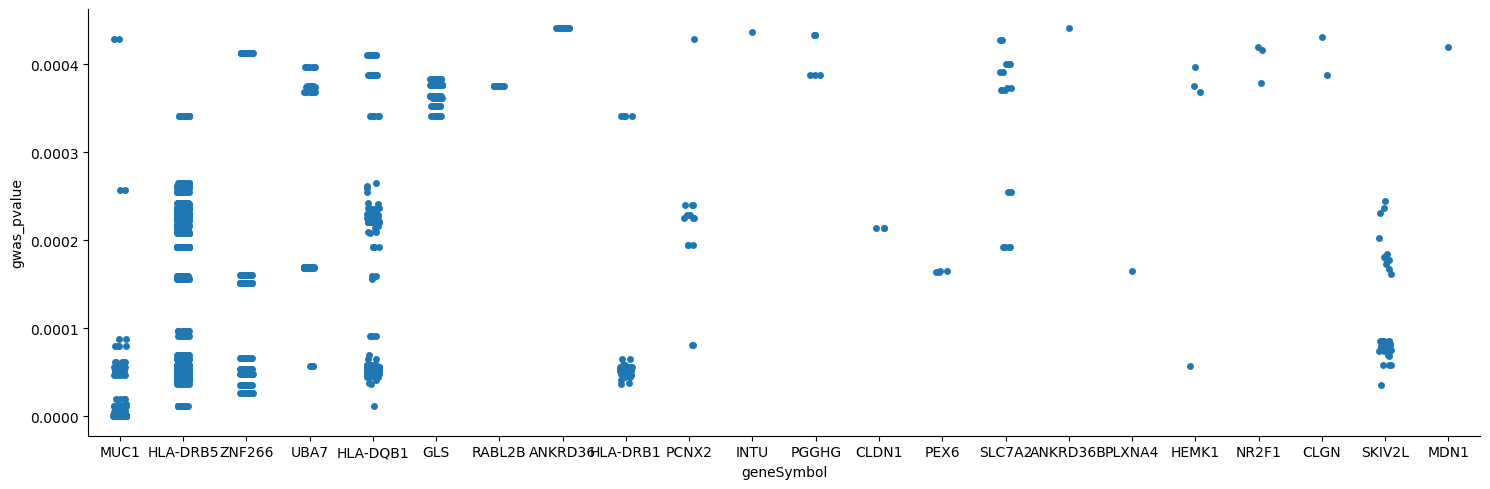

In [13]:
sns.catplot(data=HNgenes, x='geneSymbol', y='gwas_pvalue',aspect=3, kind='strip')

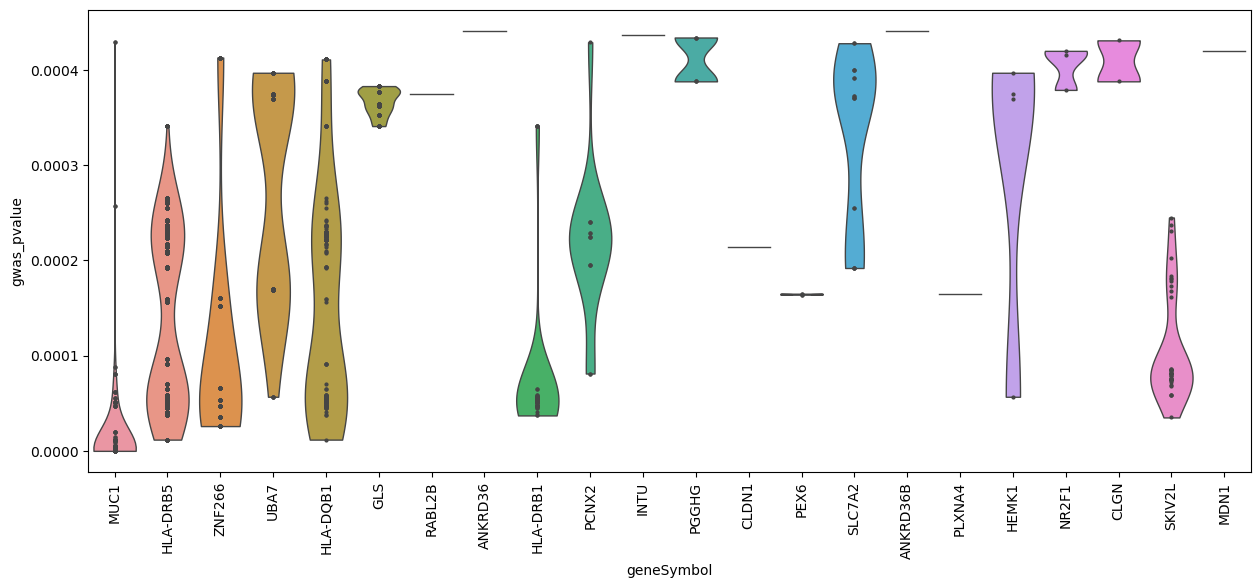

In [14]:
plt.figure(figsize=(15, 6))  
sns.violinplot(
    data=HNgenes,
    x='geneSymbol',
    y='gwas_pvalue',
    bw=.5,
    cut=0,
    inner='point',  
    scale='width',  
    linewidth=1 
)

plt.xticks(rotation=90) 
plt.show()